In [121]:
 #importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# loding data
churn  = pd.read_excel("/content/drive/MyDrive/alee/Customer+Churn+Data (1).xlsx", sheet_name = 'Data for DSBA')

In [124]:
#First 5 rows
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [125]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [126]:
#shape
churn.shape

(11260, 19)

In [127]:
#duplicates
churn.duplicated().sum()

0

In [128]:
# checking for duplicate values
print("Number of duplicate rows:",churn.duplicated().sum())

Number of duplicate rows: 0


In [129]:
# describing data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [130]:
# checking for null values
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [131]:
(churn.isnull().sum() / len(churn)) * 100

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [132]:
# drop   AccountID

churn = churn.drop(columns=['AccountID'])


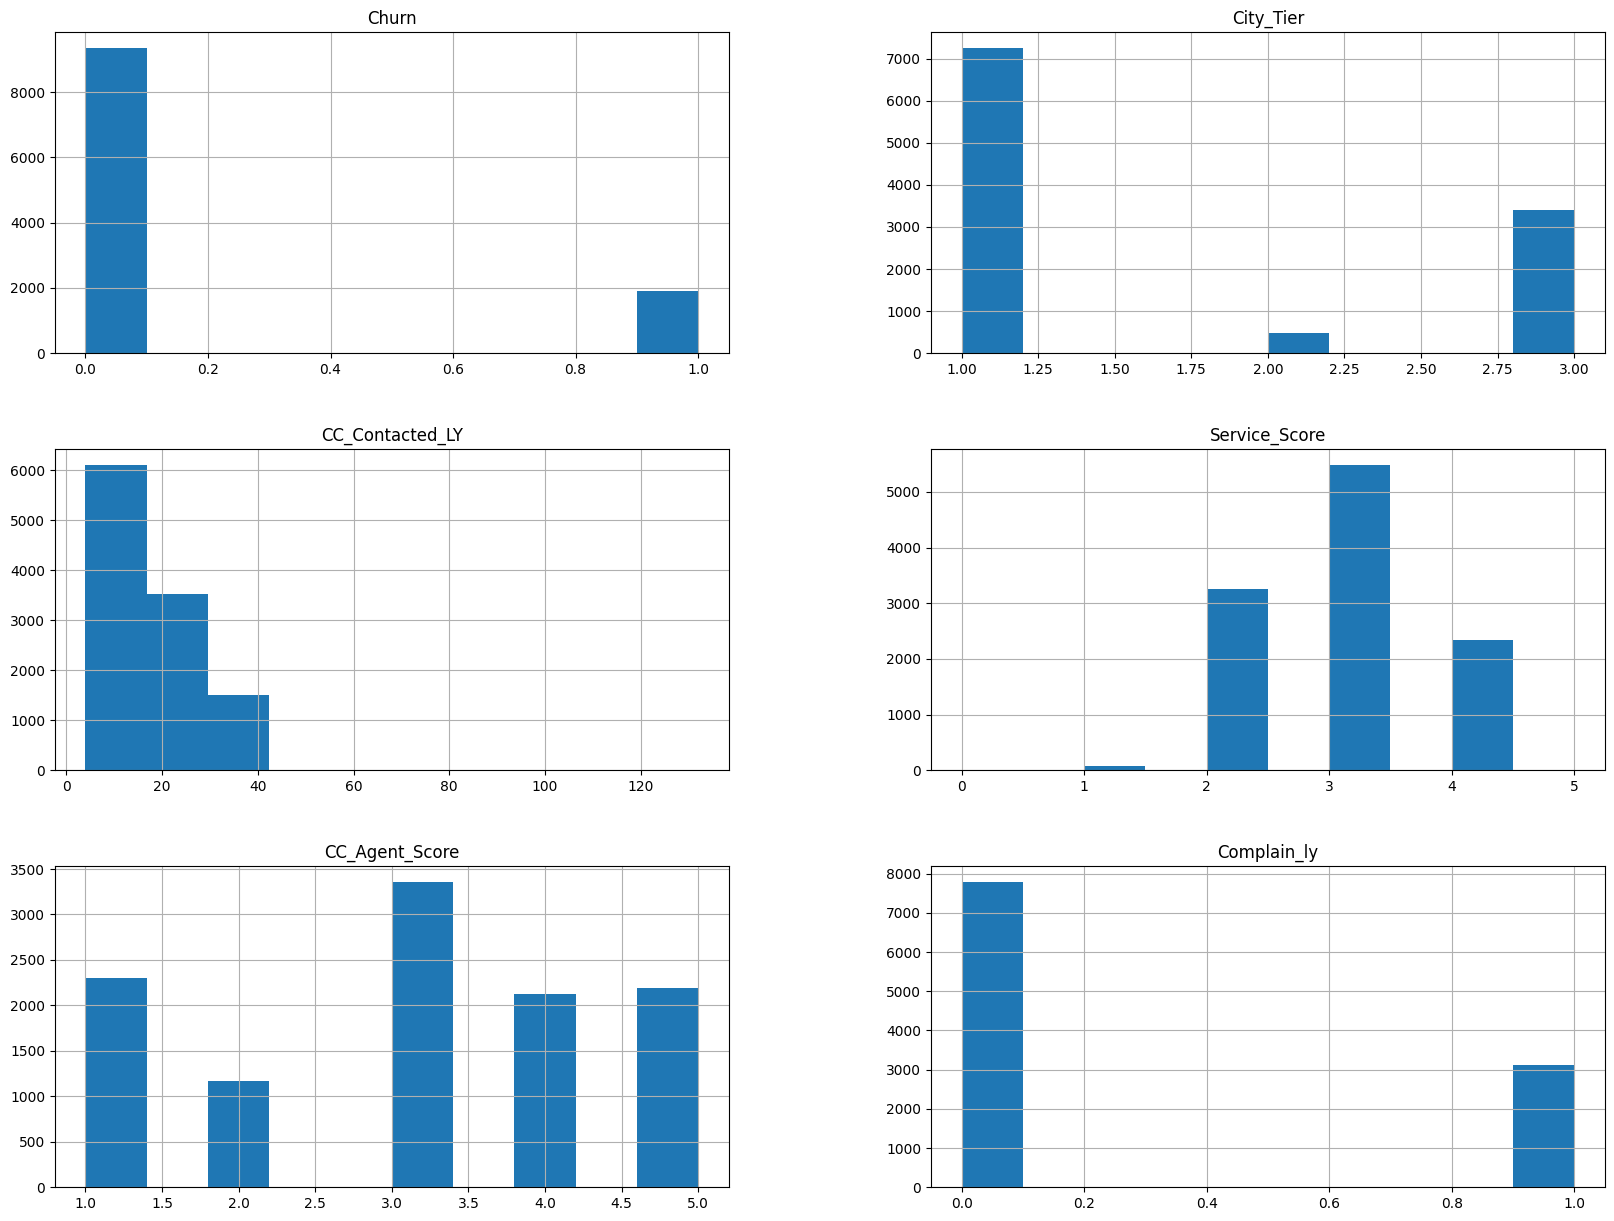

In [133]:
#checking for skewness
churn.hist(figsize=(20,15));

#### Handling missing values

In [134]:
churn["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [135]:
# Replace non-numeric values with NaN
churn["Tenure"].replace('#', np.nan, inplace=True)


In [136]:
#changing the type of 'Tenure' from object to float and replacing nan with mean
churn["Tenure"].fillna(churn["Tenure"].astype(float).mean(), inplace=True)

In [137]:
churn["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [138]:
#'City_Tier' - replacing nan with median
churn["City_Tier"].fillna(churn["City_Tier"].median(), inplace=True)

In [139]:
#'CC_Contacted_LY' - replacing nan with mean
churn["CC_Contacted_LY"].fillna(churn["CC_Contacted_LY"].mean(), inplace=True)

In [140]:
#'Service_Score' - replacing nan with mean
churn["Service_Score"].fillna(churn["Service_Score"].median(), inplace=True)

In [141]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [142]:
# Replace non-numeric values with NaN
churn["Account_user_count"].replace('@', np.nan, inplace=True)

In [143]:
#changing the type of 'Account_user_count' from object to float and replacing nan with mean
churn["Account_user_count"].fillna(churn["Account_user_count"].astype(float).median(), inplace=True)

In [144]:
#'CC_Agent_Score' - replacing nan with mean
churn["CC_Agent_Score"].fillna(churn["CC_Agent_Score"].mean(), inplace=True)

In [145]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [146]:
# Replace non-numeric values with NaN
churn["rev_per_month"].replace('+', np.nan, inplace=True)

In [147]:
#changing the type of 'rev_per_month' from object to float and replacing nan with mean
churn["rev_per_month"].fillna(churn["rev_per_month"].astype(float).mean(), inplace=True)

In [148]:
#'Complain_ly' - replacing nan with mean
churn["Complain_ly"].fillna(churn["Complain_ly"].mean(), inplace=True)

In [149]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [150]:
# Replace non-numeric values with NaN
churn["rev_growth_yoy"].replace('$', np.nan, inplace=True)

In [151]:
#changing the type of 'rev_growth_yoy' from object to float and replacing nan with mean
churn["rev_growth_yoy"].fillna(churn["rev_growth_yoy"].astype(float).mean(), inplace=True)

In [152]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [153]:
# List of non-numeric values
non_numeric_values = ['#', '$', '*']

# Replace non-numeric values with NaN
churn["coupon_used_for_payment"].replace(non_numeric_values, np.nan, inplace=True)

In [154]:
#changing the type of 'coupon_used_for_payment' from object to float and replacing nan with mean
churn["coupon_used_for_payment"].fillna(churn["coupon_used_for_payment"].astype(float).mean(), inplace=True)

In [155]:
churn["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [156]:
# Replace non-numeric values with NaN
churn["Day_Since_CC_connect"].replace('$', np.nan, inplace=True)

In [157]:
#changing the type of 'Day_Since_CC_connect' from object to float and replacing nan with mean
churn["Day_Since_CC_connect"].fillna(churn["Day_Since_CC_connect"].astype(float).mean(), inplace=True)

In [158]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [159]:
# Replace non-numeric values with NaN
churn["cashback"].replace('$', np.nan, inplace=True)

In [160]:
#changing the type of 'cashback' from object to float and replacing nan with mean
churn["cashback"].fillna(churn["cashback"].astype(float).mean(), inplace=True)



---




In [161]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [162]:
# Fill NaN values with "Others"
churn["Payment"].fillna("Others", inplace=True)

In [163]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [164]:
# Replace 'M' with 'Male' and 'F' with 'Female'
churn["Gender"].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

In [165]:
# Check unique values to confirm
print(churn["Gender"].unique())

['Female' 'Male' nan]


In [166]:
# Fill NaN values with "Others"
churn["Gender"].fillna("Others", inplace=True)

In [167]:
# Fill NaN values with "Others"
churn["account_segment"].fillna("Others", inplace=True)

In [168]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [169]:
# Fill NaN values with "Others"
churn["Marital_Status"].fillna("Others", inplace=True)

In [170]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [171]:
churn["Gender"].replace({'&&&&':'Others'}, inplace=True)

In [172]:
# Fill NaN values with the mode
churn["Login_device"].fillna(churn["Login_device"].mode()[0], inplace=True)


In [173]:
mode_value = churn['Login_device'].mode()[0]
churn['Login_device'] = churn['Login_device'].replace('&&&&', mode_value)





---



In [174]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [175]:
# checking for null values
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

#### **Exploratory Data Analysis**

In [176]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93000,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90000,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196.23637,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07000,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60000,Mobile


In [177]:
churn.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,11.025086,1.647425,17.867091,2.903375,3.704973,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.236370
std,0.374223,12.754481,0.912763,8.813075,0.722476,1.004383,1.372646,11.483711,0.444377,3.757220,1.969288,3.638375,174.867409
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,4.000000,167.490000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000
max,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [178]:
# Summary statistics
numeric_cols = ['Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
                'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
                'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
print(churn[numeric_cols].describe())




              Churn        Tenure     City_Tier  CC_Contacted_LY  \
count  11260.000000  11260.000000  11260.000000     11260.000000   
mean       0.168384     11.025086      1.647425        17.867091   
std        0.374223     12.754481      0.912763         8.813075   
min        0.000000      0.000000      1.000000         4.000000   
25%        0.000000      2.000000      1.000000        11.000000   
50%        0.000000      9.000000      1.000000        16.000000   
75%        0.000000     16.000000      3.000000        23.000000   
max        1.000000     99.000000      3.000000       132.000000   

       Service_Score  Account_user_count  CC_Agent_Score  rev_per_month  \
count   11260.000000        11260.000000    11260.000000   11260.000000   
mean        2.903375            3.704973        3.066493       6.362594   
std         0.722476            1.004383        1.372646      11.483711   
min         0.000000            1.000000        1.000000       1.000000   
25%         

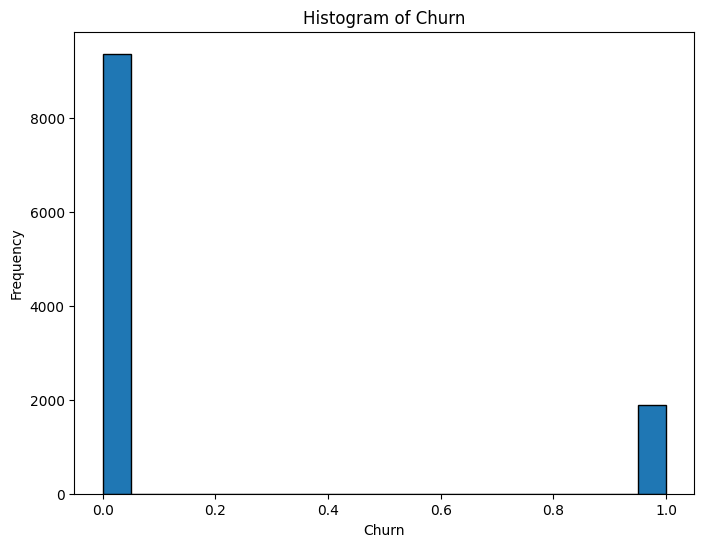

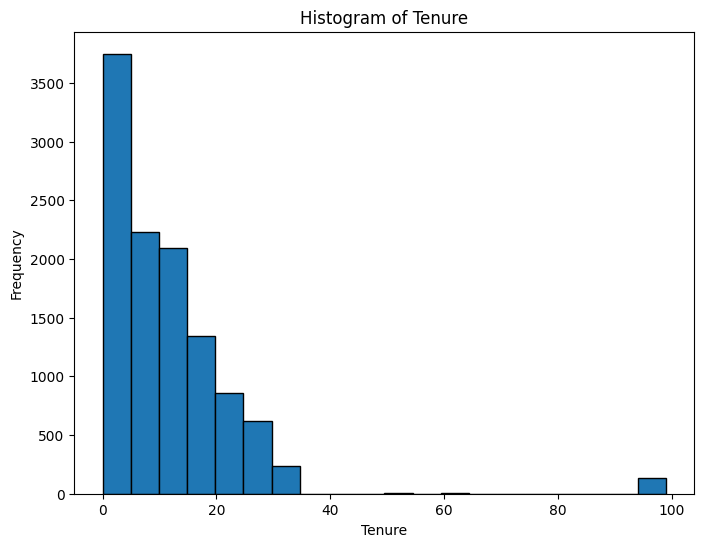

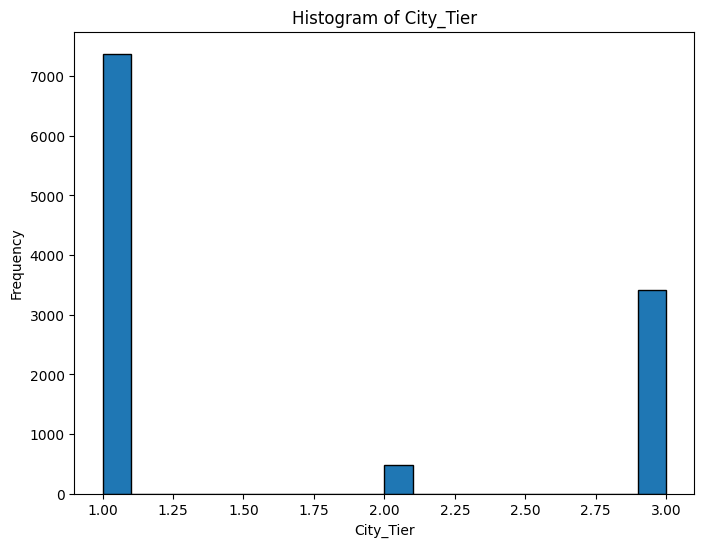

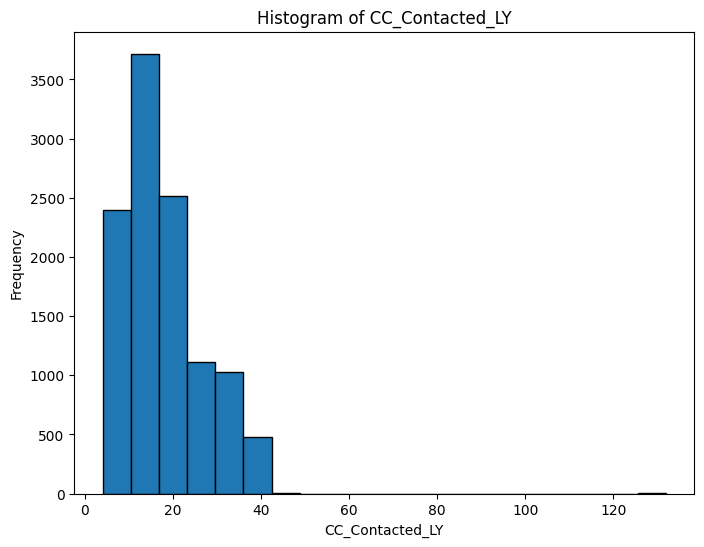

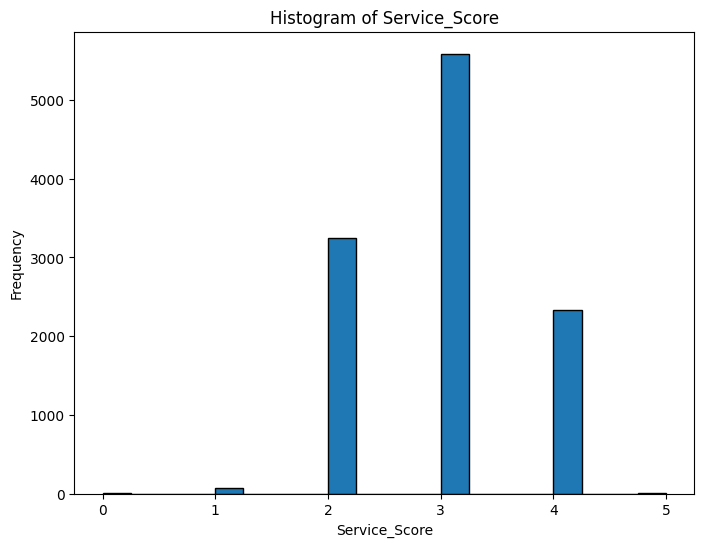

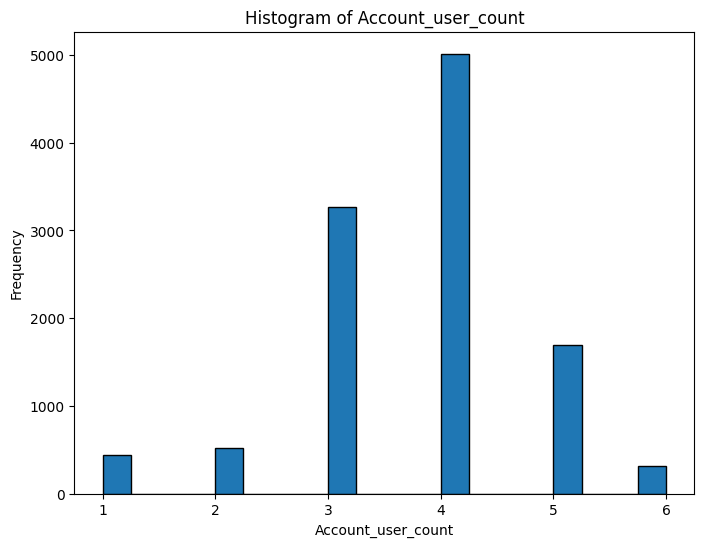

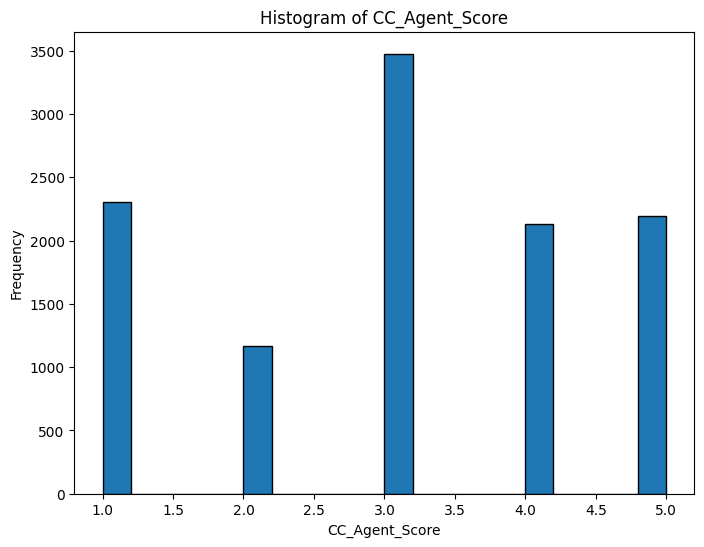

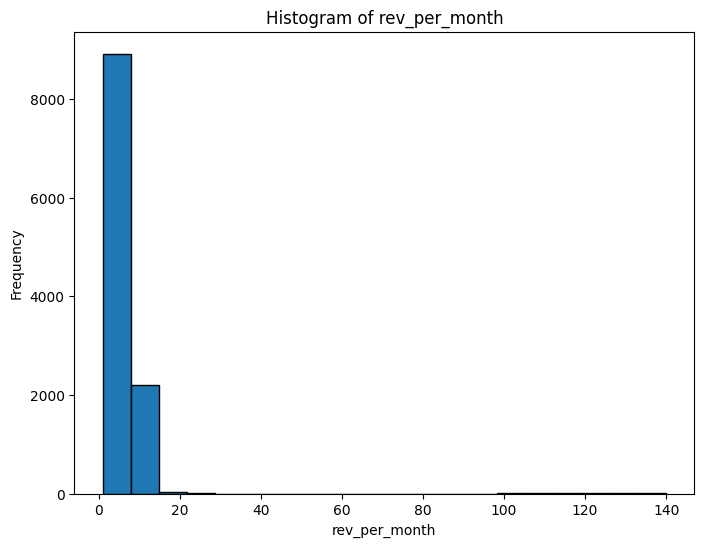

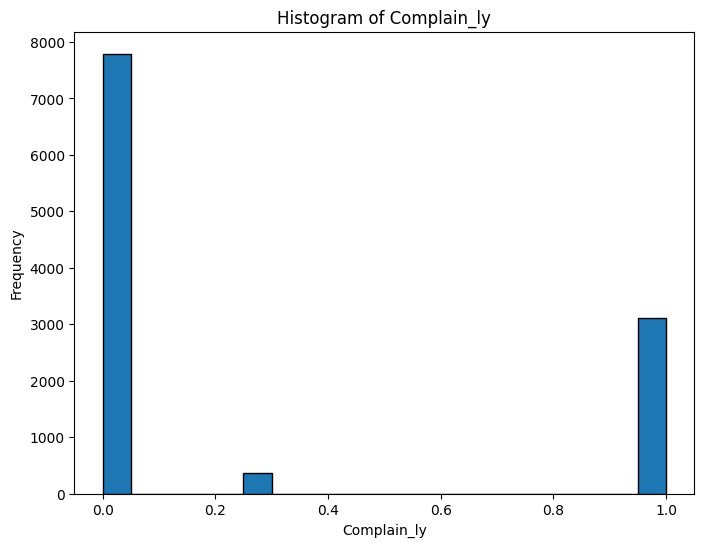

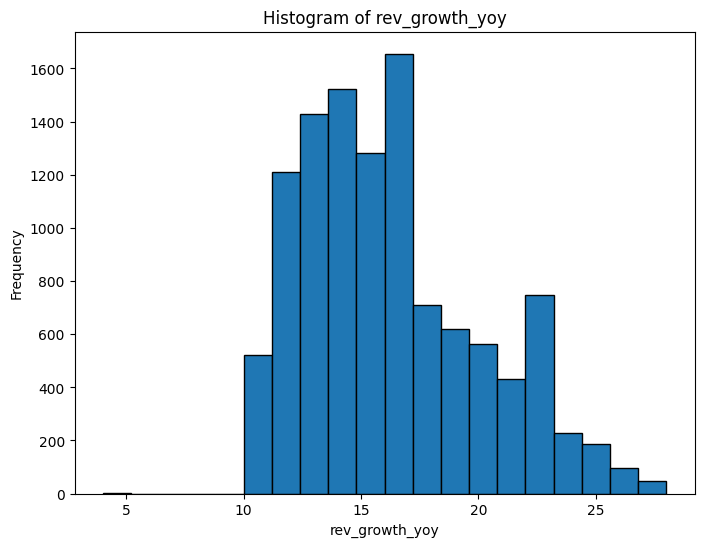

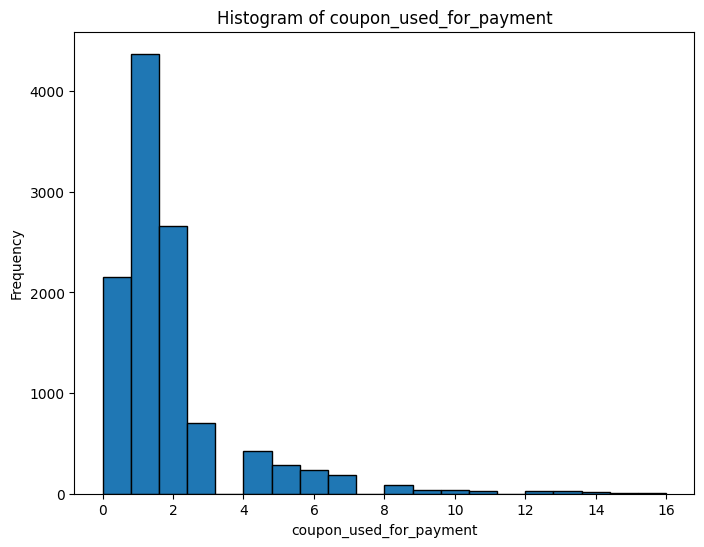

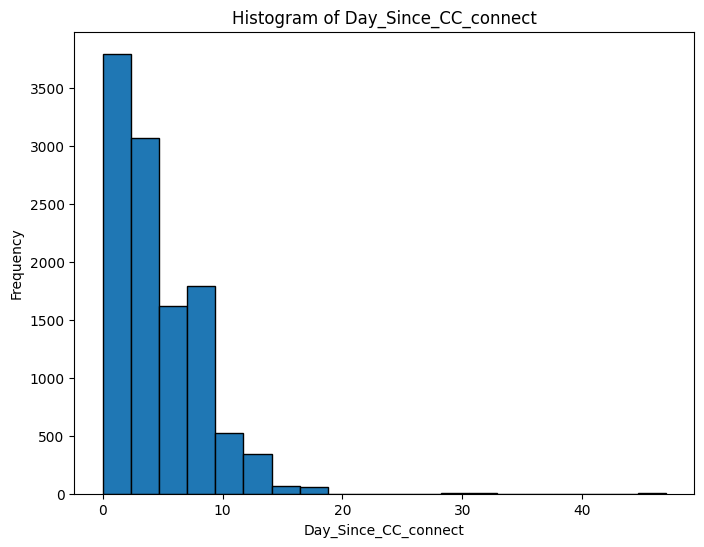

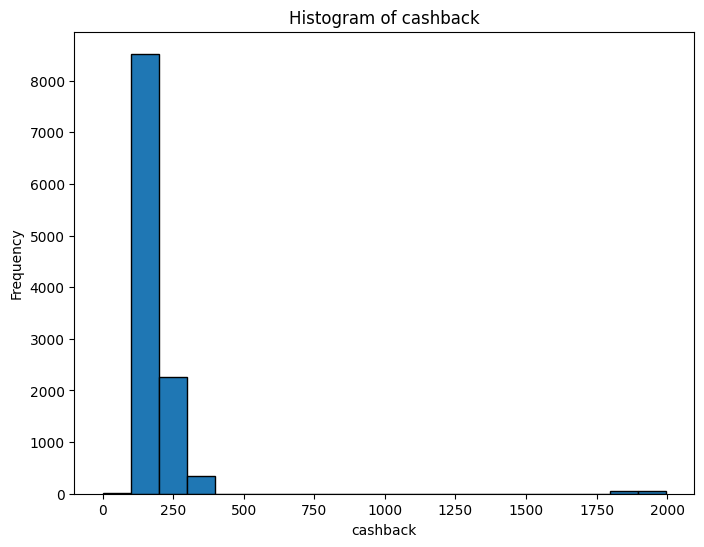

In [179]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(churn[col], bins=20, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


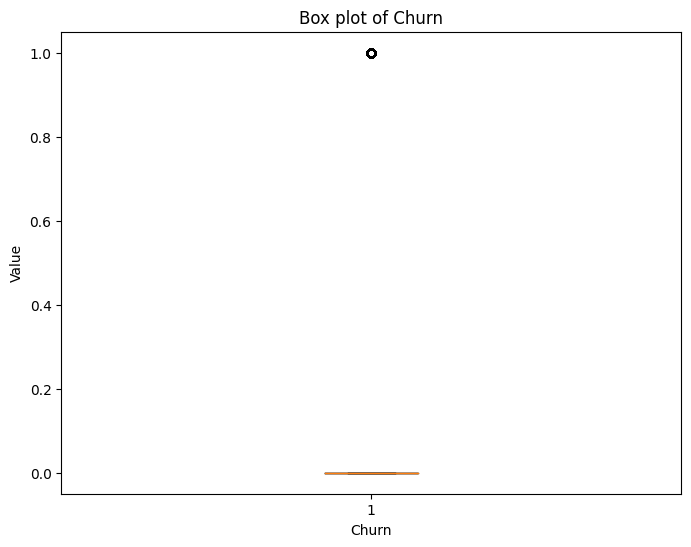

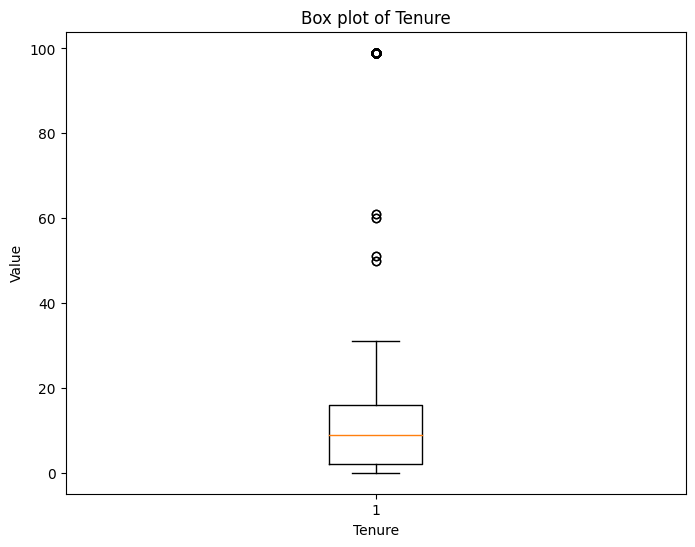

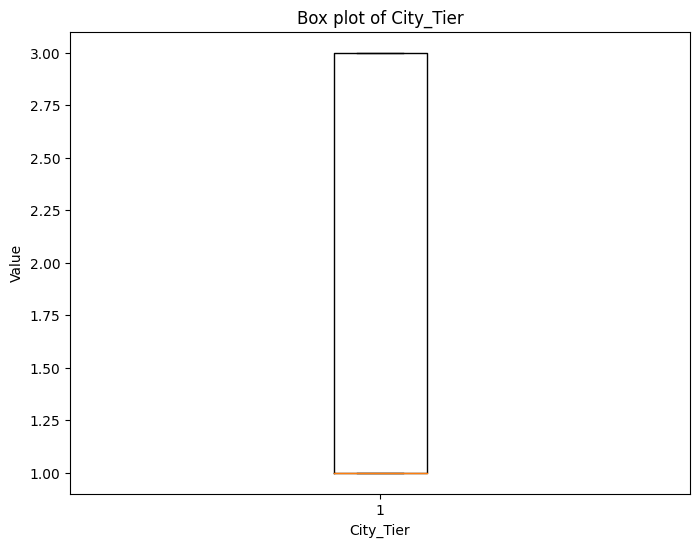

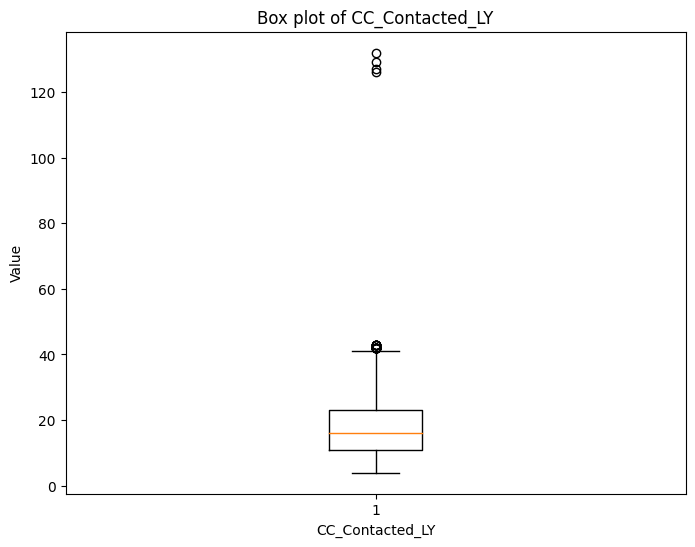

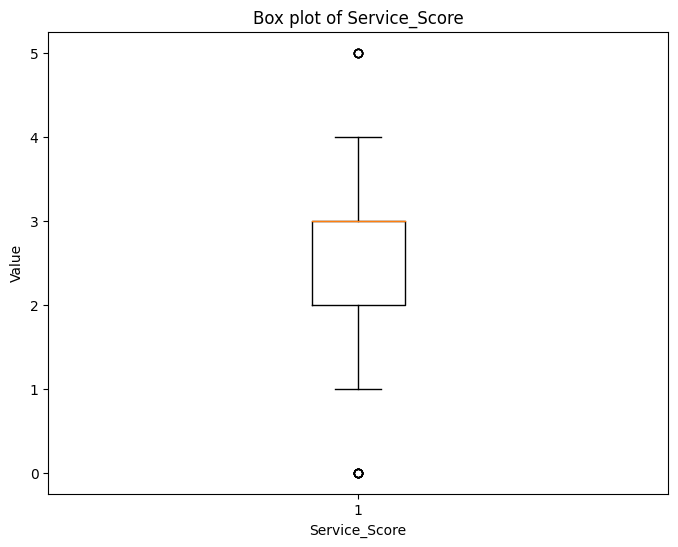

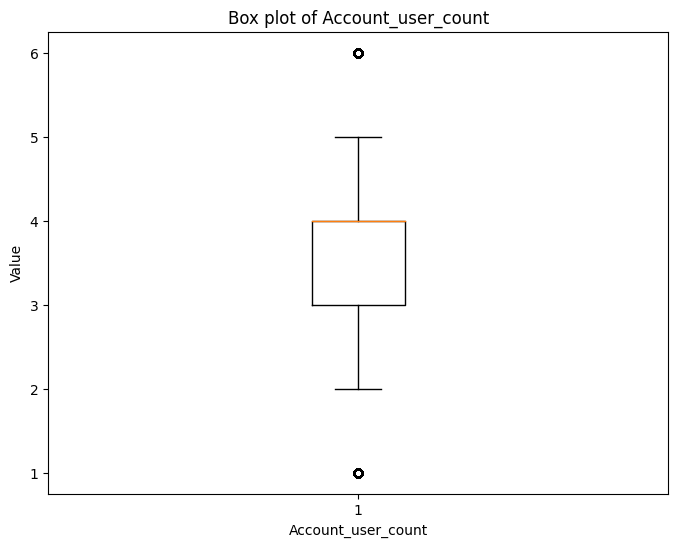

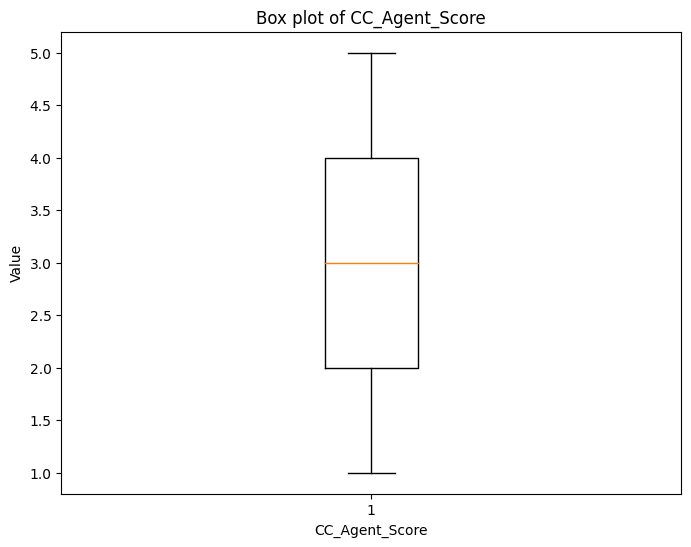

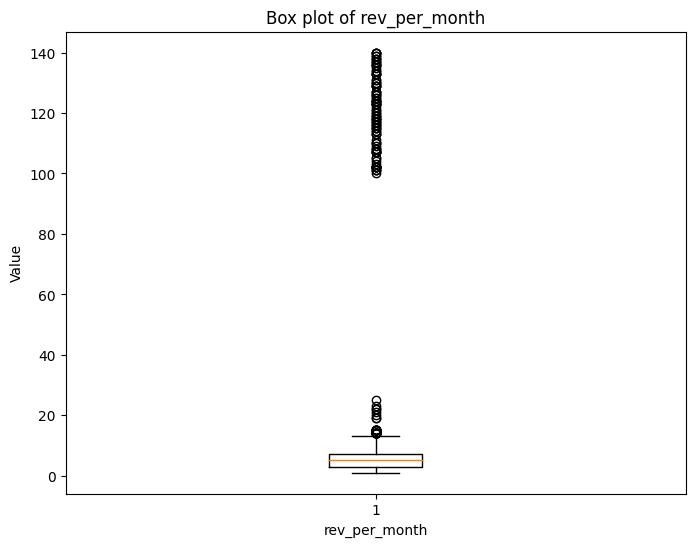

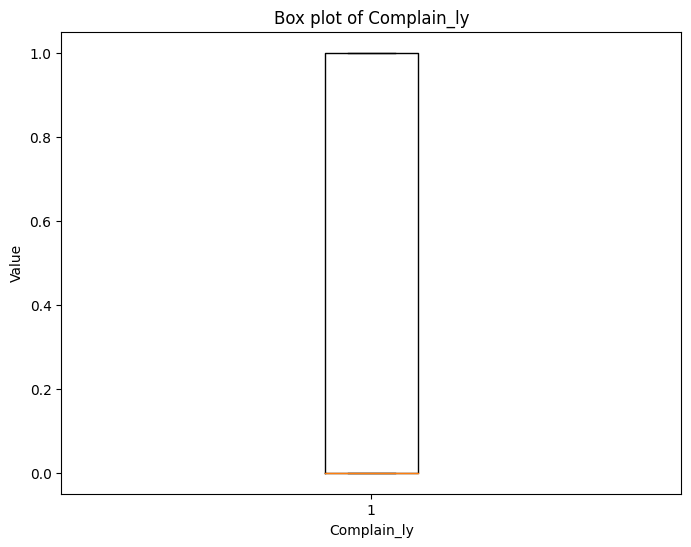

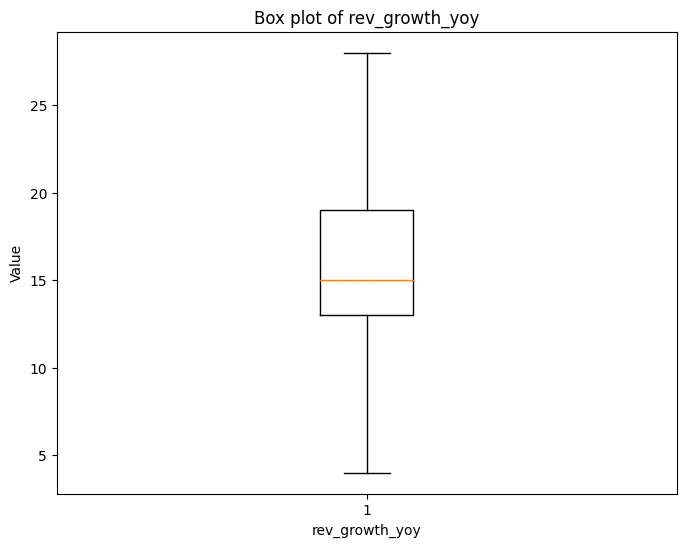

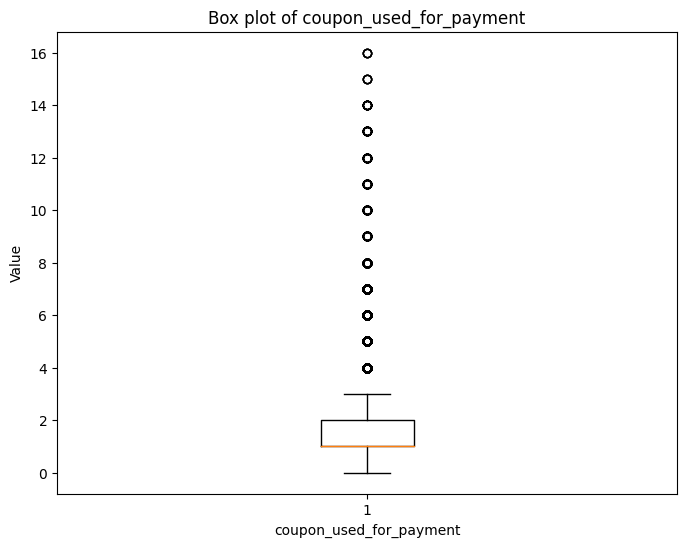

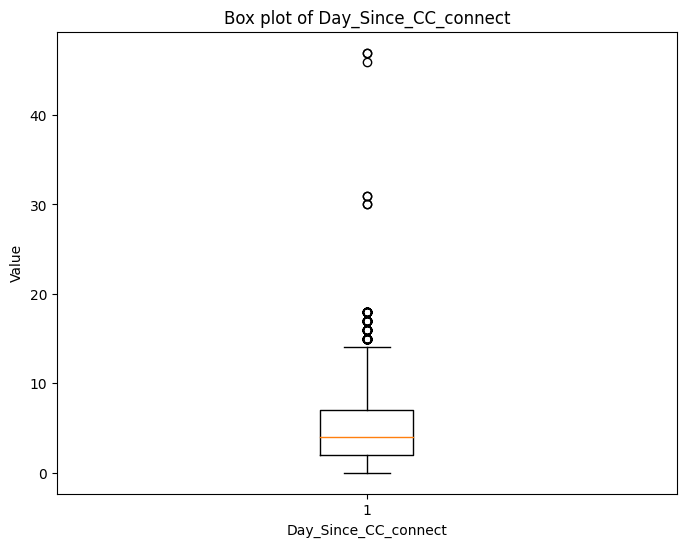

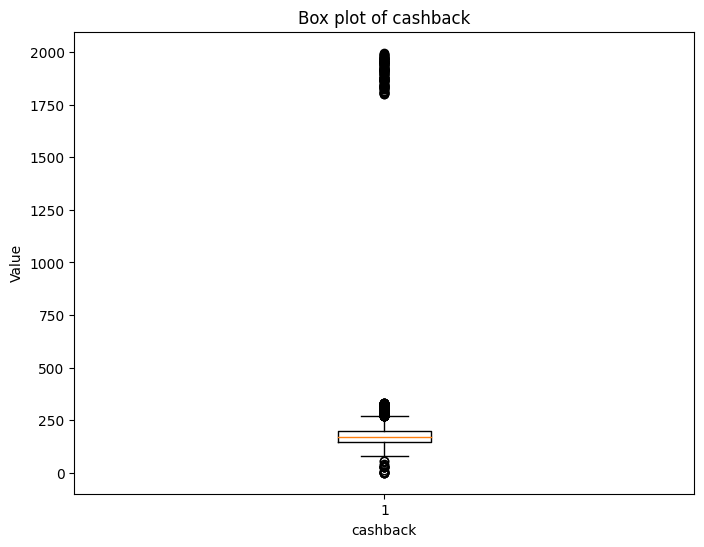

In [180]:
# Box plots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(churn[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Box plot of {col}')
    plt.show()

In [181]:
# Frequency counts
object_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status','Login_device']

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Others               109
Name: count, dtype: int64
Gender
Male      6704
Female    4448
Others     108
Name: count, dtype: int64
account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Others            97
Super +           47
Name: count, dtype: int64
Marital_Status
Married     5860
Single      3520
Divorced    1668
Others       212
Name: count, dtype: int64
Login_device
Mobile      8242
Computer    3018
Name: count, dtype: int64


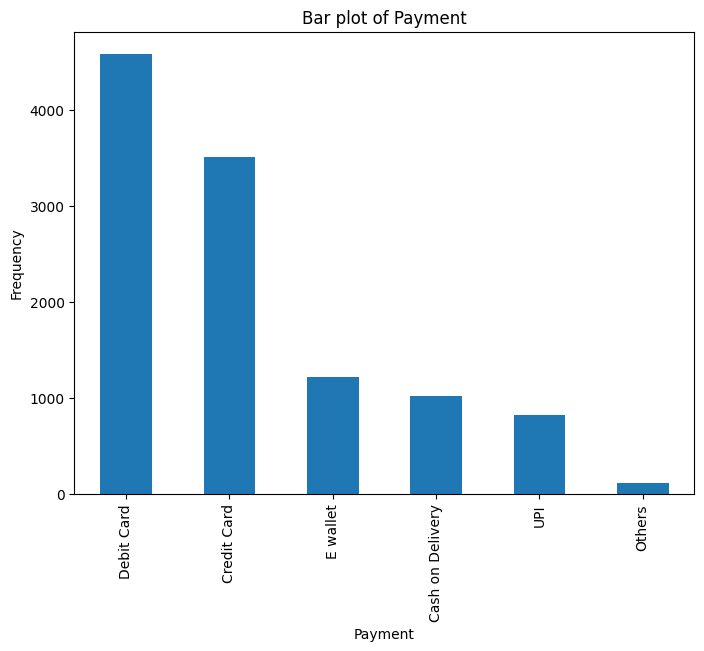

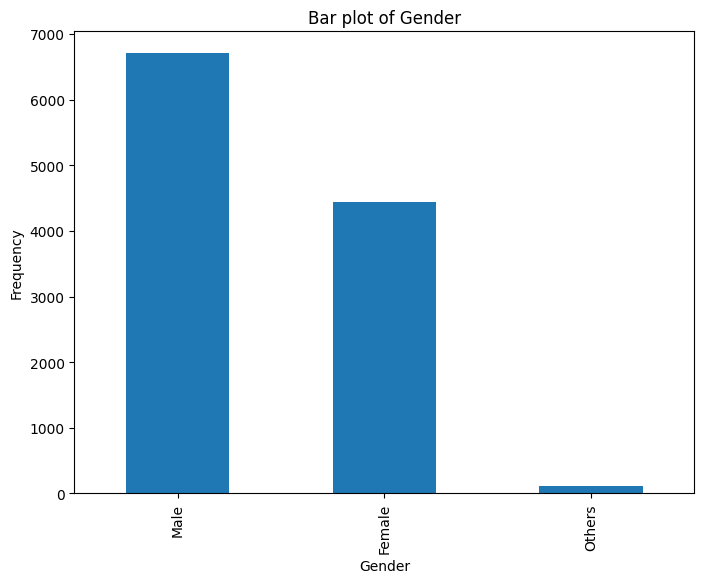

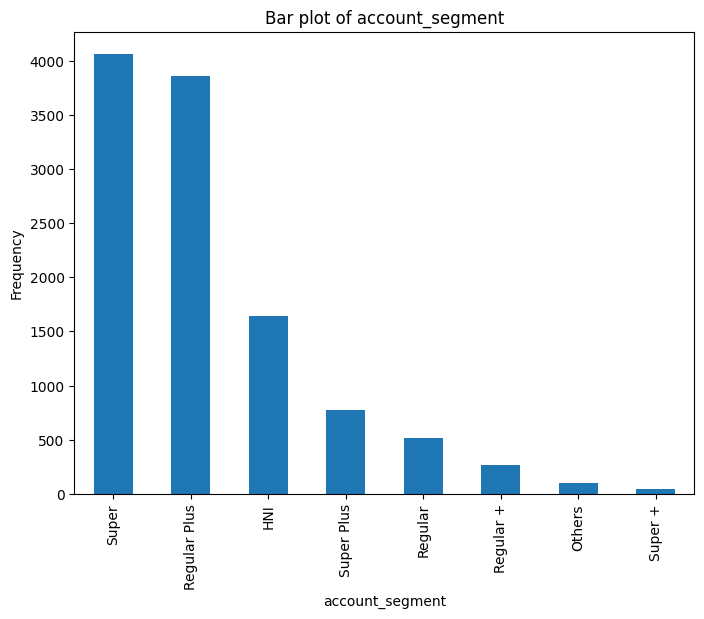

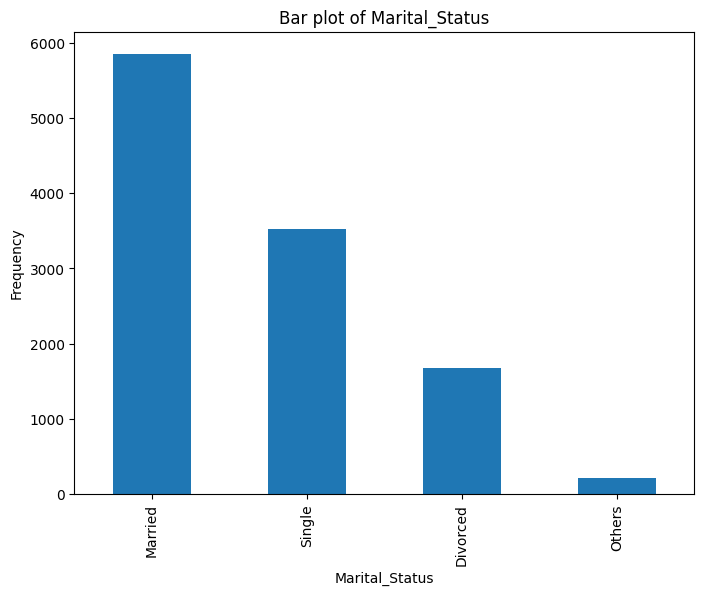

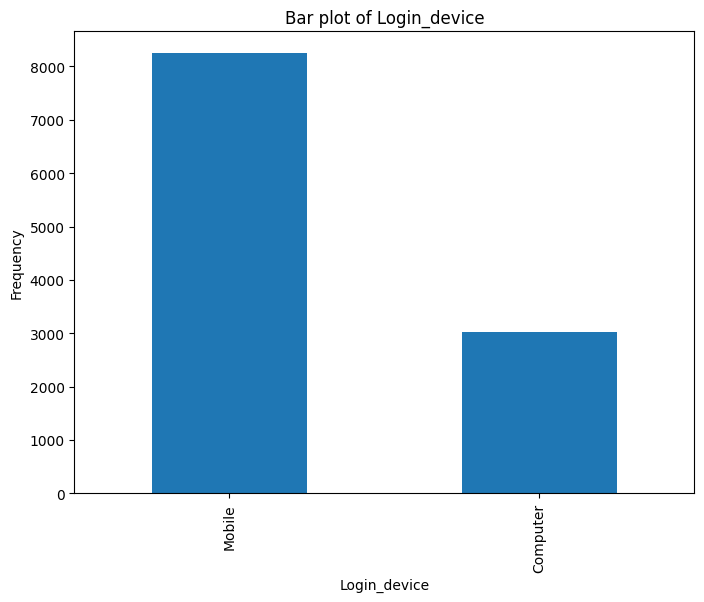

In [182]:
for col in object_cols:
    print(churn[col].value_counts())

# Bar plots
for col in object_cols:
    plt.figure(figsize=(8, 6))
    churn[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar plot of {col}')
    plt.show()

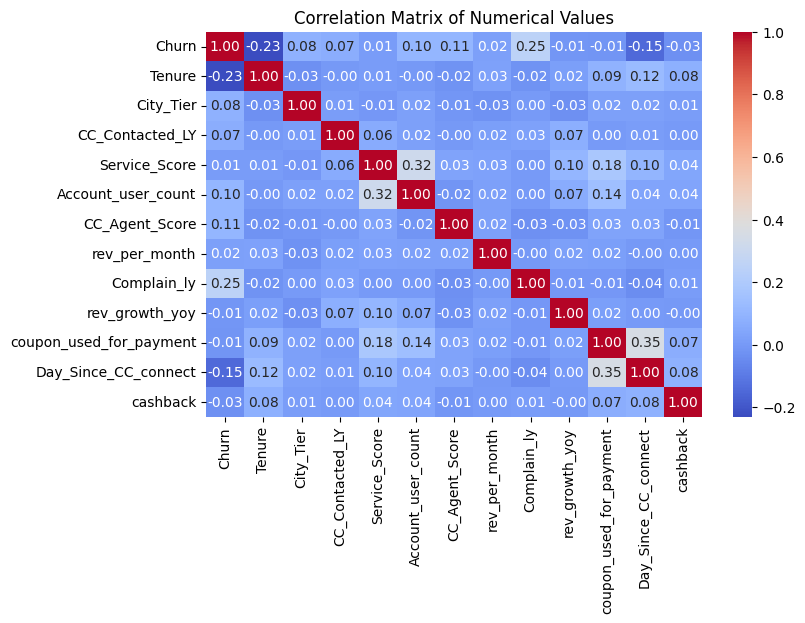

In [183]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(churn[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Values")
plt.show()

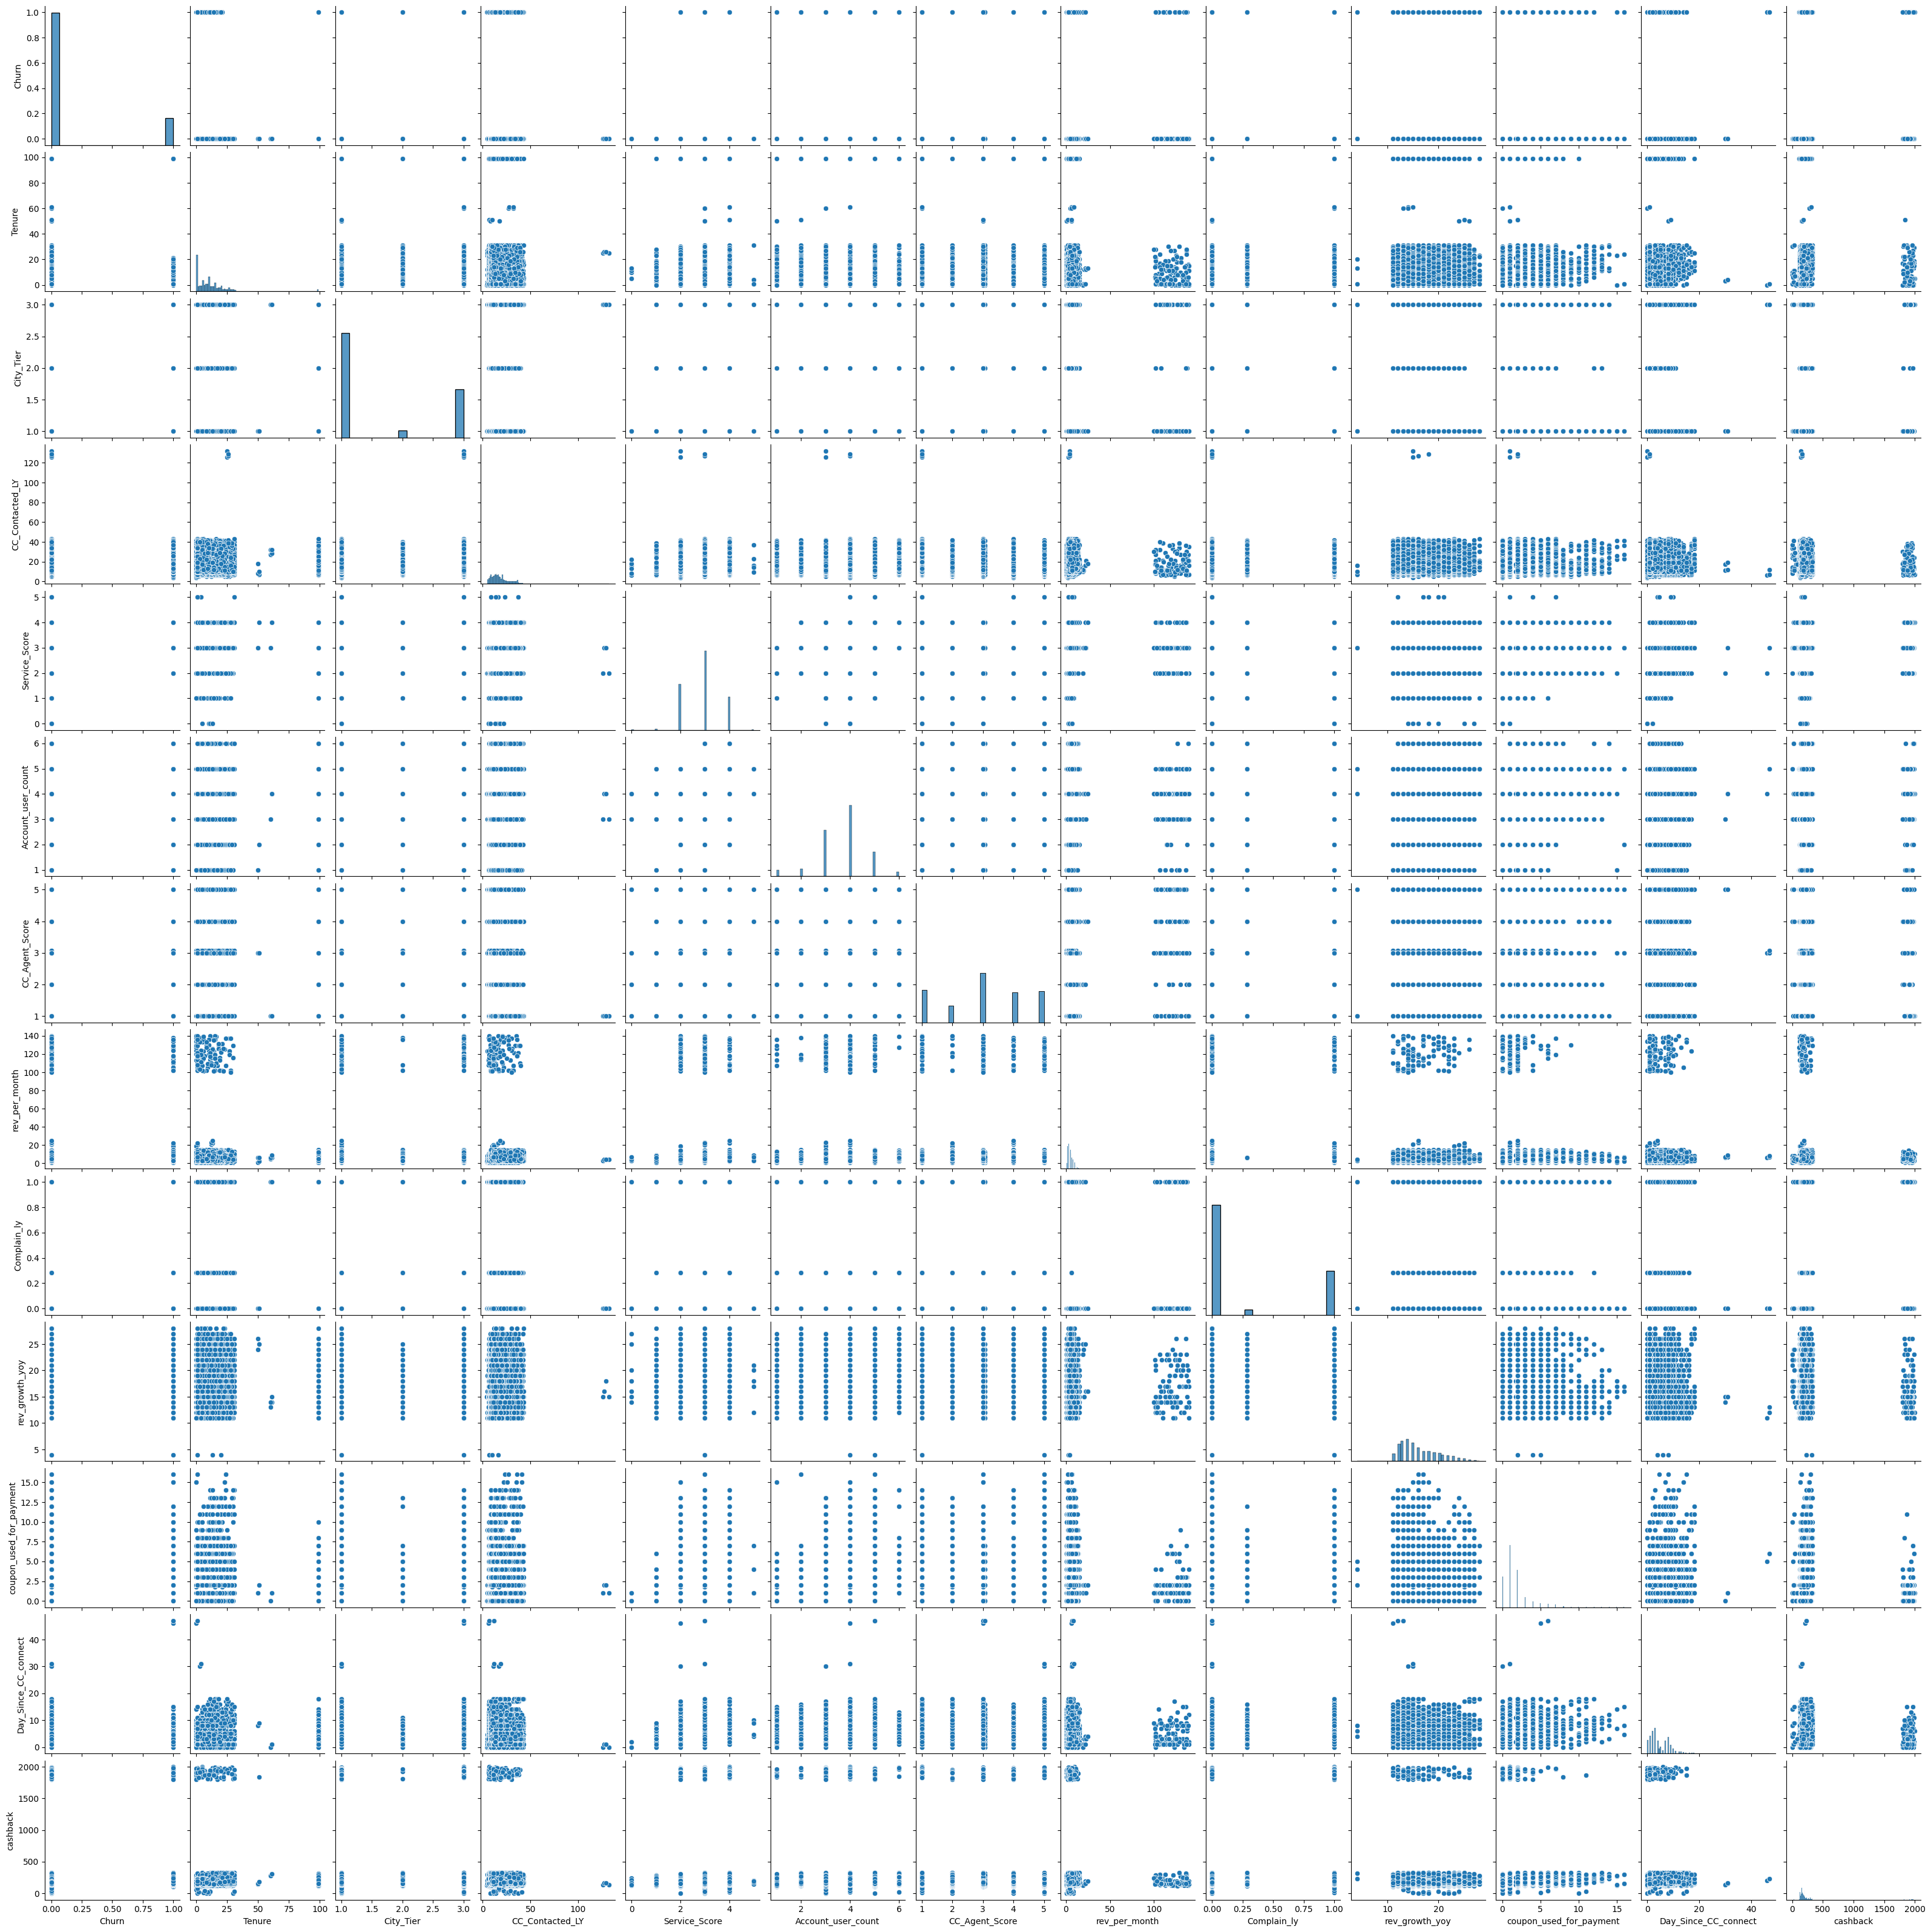

In [184]:
sns.pairplot(data = churn)
plt.show()

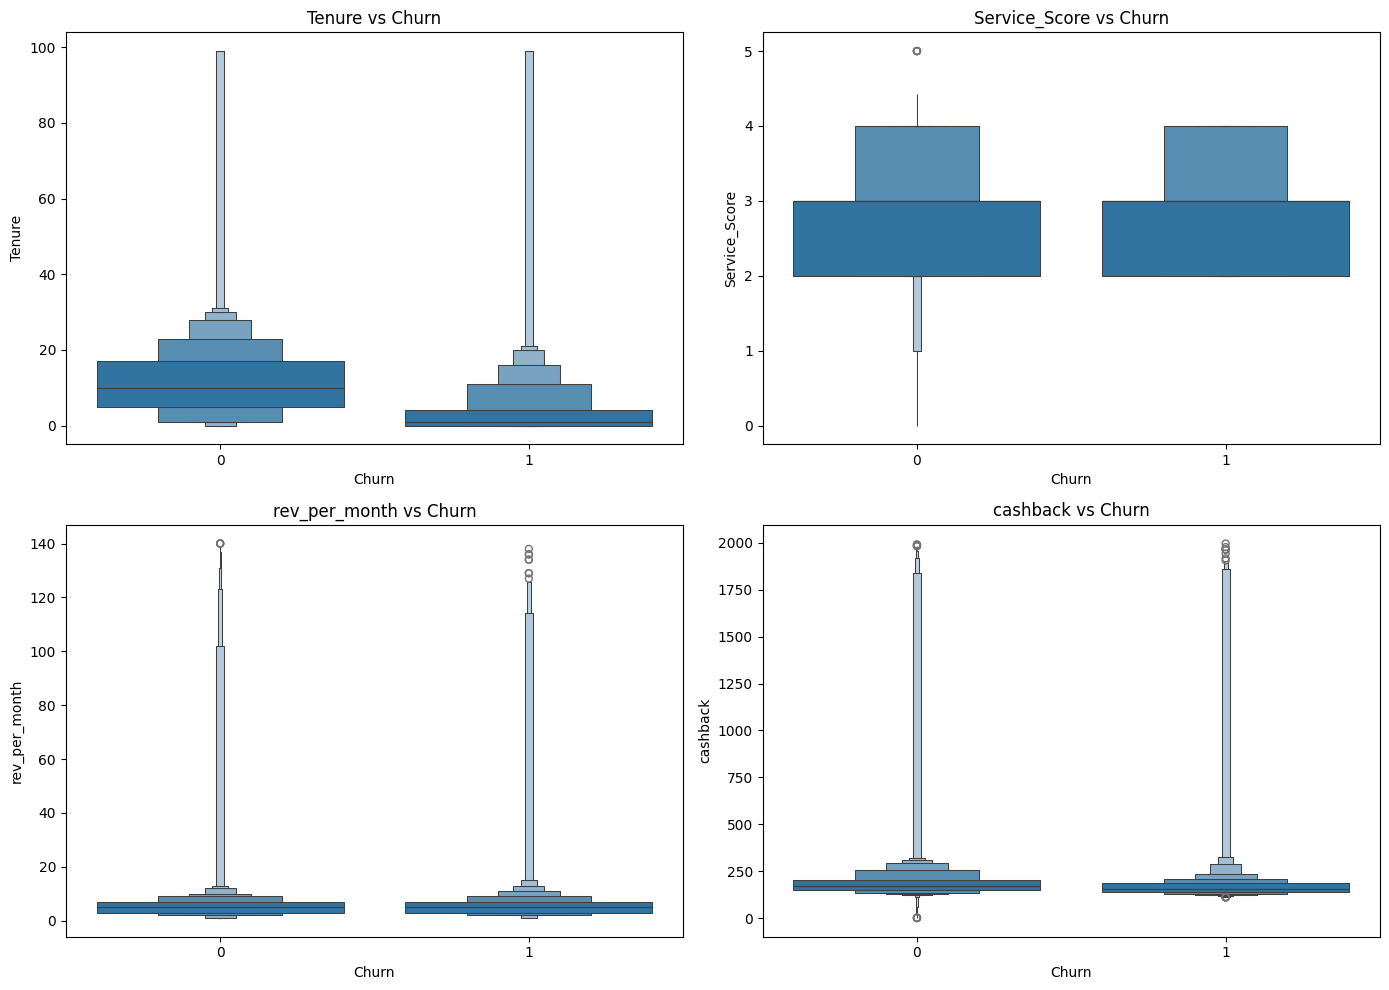

In [185]:
# Numeric-Categorical Relationships using boxen plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxenplot(x='Churn', y='Tenure', data=churn, ax=axes[0, 0])
axes[0, 0].set_title('Tenure vs Churn')

sns.boxenplot(x='Churn', y='Service_Score', data=churn, ax=axes[0, 1])
axes[0, 1].set_title('Service_Score vs Churn')

sns.boxenplot(x='Churn', y='rev_per_month', data=churn, ax=axes[1, 0])
axes[1, 0].set_title('rev_per_month vs Churn')

sns.boxenplot(x='Churn', y='cashback', data=churn, ax=axes[1, 1])
axes[1, 1].set_title('cashback vs Churn')

plt.tight_layout()
plt.show()

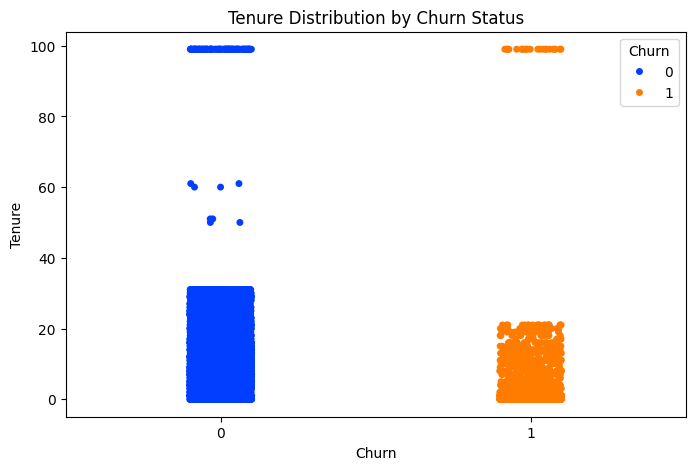

In [186]:
plt.figure(figsize=(8, 5))
sns.stripplot(x=churn["Churn"], y=churn['Tenure'], jitter=True, hue=churn["Churn"], palette= 'bright')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure Distribution by Churn Status')
plt.legend(title='Churn', loc='upper right')
plt.show()

Text(0.5, 1.0, 'Churn rate according to City_Tier')

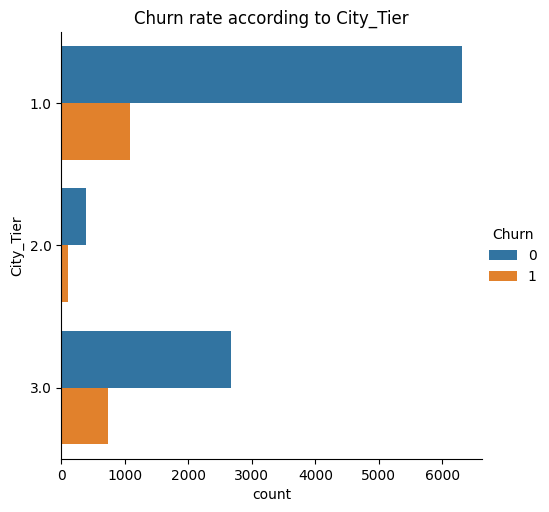

In [187]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to City_Tier')

Text(0.5, 1.0, 'Churn rate according to payment method')

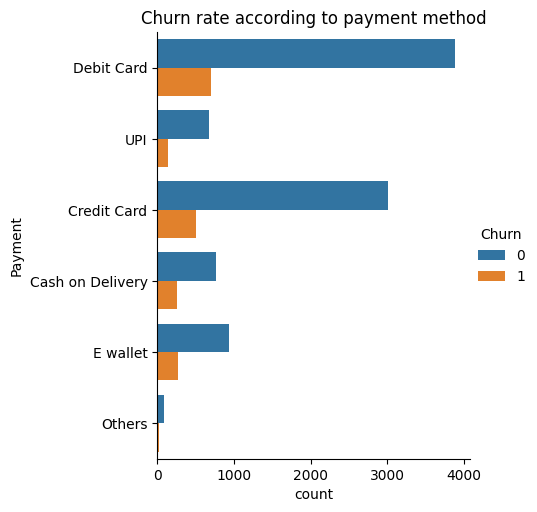

In [188]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to payment method')

Text(0.5, 1.0, 'Churn rate according to gender')

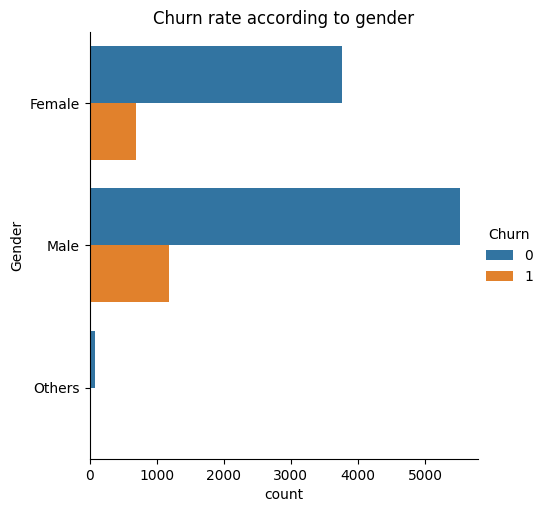

In [189]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to gender')

Text(0.5, 1.0, 'Churn rate according to Service_Score')

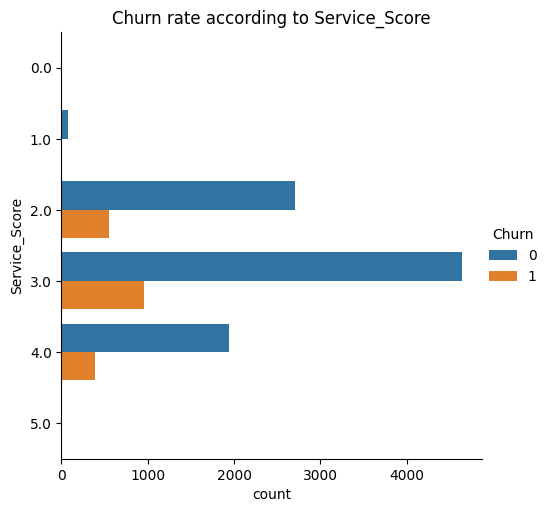

In [190]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to Service_Score')

Text(0.5, 1.0, 'Churn rate according to Account_user_count')

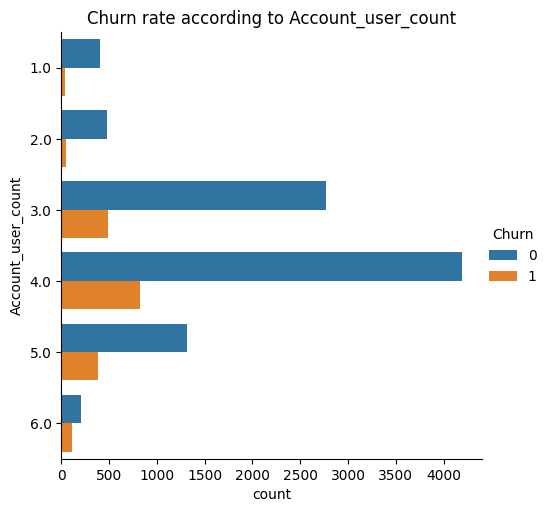

In [191]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to Account_user_count')

Text(0.5, 1.0, 'Churn rate according to Account_segment')

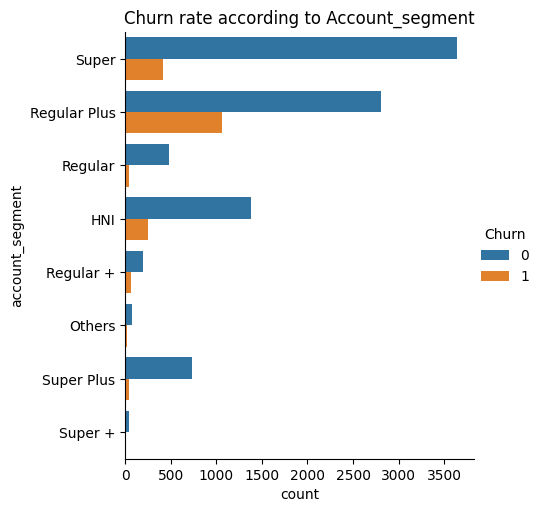

In [192]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)
plt.title('Churn rate according to Account_segment')

In [193]:
churn["Churn"].unique()

array([1, 0])

In [194]:
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [195]:
numeric_cols = [col for col in churn.columns if churn[col].dtype in ['float64', 'int64'] and col != 'Churn']

# Function to handle outliers
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mask outliers
    column_masked = column.mask((column < lower_bound) | (column > upper_bound))

    # Impute NaN values with mean
    column_masked.fillna(column.mean(), inplace=True)  # Use original column mean for stability

    return column_masked

# Apply outlier handling to numeric columns
for col in numeric_cols:
    churn[col] = handle_outliers_iqr(churn[col])

# Check for NaN values after handling outliers and mean imputation
print(churn.isnull().sum())

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64


In [196]:
churn["Churn"].unique()

array([1, 0])

In [197]:
# Scale the numeric columns
scaler = MinMaxScaler()
scaled_cols = scaler.fit_transform(churn[numeric_cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=numeric_cols)

# Combine the scaled numeric columns with the encoded object columns
churn_scaled = pd.concat([scaled_cols, churn.drop(numeric_cols, axis=1)], axis=1)

# Check the head of the scaled dataset
churn_scaled.head()


,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn,Payment,Gender,account_segment,Marital_Status,Login_device
0,0.129032,1.0,0.054054,0.666667,0.333333,0.25,0.666667,1.0,0.291667,0.333333,0.357143,0.414635,1,Debit Card,Female,Super,Single,Mobile
1,0.000000,0.0,0.108108,0.666667,0.666667,0.50,0.500000,1.0,0.458333,0.000000,0.000000,0.209603,1,UPI,Male,Regular Plus,Single,Mobile
2,0.000000,0.0,0.702703,0.333333,0.666667,0.50,0.416667,1.0,0.416667,0.000000,0.214286,0.605360,1,Debit Card,Male,Regular Plus,Single,Mobile
3,0.000000,1.0,0.297297,0.333333,0.666667,1.00,0.583333,0.0,0.791667,0.000000,0.214286,0.278788,1,Debit Card,Male,Super,Single,Mobile
4,0.000000,0.0,0.216216,0.333333,0.333333,1.00,0.166667,0.0,0.291667,0.333333,0.214286,0.255306,1,Credit Card,Male,Regular Plus,Single,Mobile


In [198]:
churn_scaled["Churn"].unique()

array([1, 0])

Class Distribution:
Churn
0    9364
1    1896
Name: count, dtype: int64


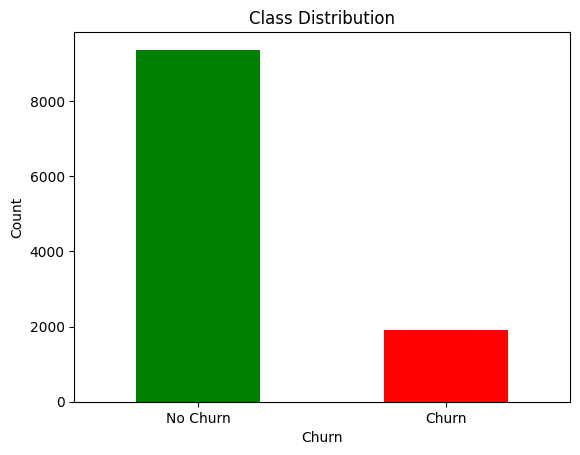

In [199]:
# Assuming your target variable is named 'Churn'
class_distribution = churn_scaled['Churn'].value_counts()

print("Class Distribution:")
print(class_distribution)

# Plotting class distribution
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.show()

In [200]:
# Perform one-hot encoding for all object columns
churn_encoded = pd.get_dummies(churn_scaled, columns=['Gender', 'Payment', 'account_segment', 'Marital_Status', 'Login_device'])



In [201]:
churn_encoded.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,...,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Others,Marital_Status_Single,Login_device_Computer,Login_device_Mobile
0,0.129032,1.0,0.054054,0.666667,0.333333,0.25,0.666667,1.0,0.291667,0.333333,...,False,True,False,False,False,False,False,True,False,True
1,0.000000,0.0,0.108108,0.666667,0.666667,0.50,0.500000,1.0,0.458333,0.000000,...,True,False,False,False,False,False,False,True,False,True
2,0.000000,0.0,0.702703,0.333333,0.666667,0.50,0.416667,1.0,0.416667,0.000000,...,True,False,False,False,False,False,False,True,False,True
3,0.000000,1.0,0.297297,0.333333,0.666667,1.00,0.583333,0.0,0.791667,0.000000,...,False,True,False,False,False,False,False,True,False,True
4,0.000000,0.0,0.216216,0.333333,0.333333,1.00,0.166667,0.0,0.291667,0.333333,...,True,False,False,False,False,False,False,True,False,True


In [202]:
churn_encoded.describe()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.321612,0.323712,0.371504,0.634836,0.582637,0.516623,0.353122,0.285334,0.508058,0.422008,0.320306,0.479889,0.168384
std,0.270062,0.456381,0.228222,0.238986,0.251603,0.343162,0.226814,0.444377,0.156551,0.275044,0.236697,0.176987,0.374223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.064516,0.000000,0.189189,0.333333,0.333333,0.250000,0.166667,0.000000,0.375000,0.333333,0.142857,0.352004,0.000000
50%,0.290323,0.000000,0.324324,0.666667,0.666667,0.500000,0.333333,0.000000,0.458333,0.333333,0.285714,0.455479,0.000000
75%,0.483871,1.000000,0.513514,0.666667,0.666667,0.750000,0.500000,1.000000,0.625000,0.666667,0.500000,0.605360,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Model building**

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [204]:
# Splitting the data into features (X) and target variable (y)
X = churn_encoded.drop(columns=['Churn'])
y = churn_encoded['Churn']

In [205]:
# Splitting the data into train (70%), test (15%), and validation (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [206]:
# Check the class distribution in the training set before SMOTE
print("Class distribution in the training set before SMOTE:")
print(y_train.value_counts())


Class distribution in the training set before SMOTE:
Churn
0    6555
1    1327
Name: count, dtype: int64


In [207]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [208]:
# Check class distribution after SMOTE
print("Class distribution in the training set after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution in the training set after SMOTE:
Churn
0    6555
1    6555
Name: count, dtype: int64


In [209]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    roc_auc = roc_auc_score(y_val, y_pred_val)
    return accuracy, precision, recall, f1, roc_auc

In [210]:
# Define and train models
models = {
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),  # Use solver that supports predict_proba
    "SVM": SVC(probability=True, random_state=42),  # SVM with probability estimates
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42)
}

In [211]:
# Train models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_res, y_train_res)

Training Random Forest...
Training Logistic Regression...
Training SVM...
Training Gradient Boosting...
Training Decision Tree...


In [212]:
# Collecting evaluation metrics for validation set
accuracy_val = []
precision_val = []
recall_val = []
f1_val = []


In [213]:
# Validate models and collect metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name} on validation set...")
    y_pred_val = model.predict(X_val)
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
    precision_val.append(precision_score(y_val, y_pred_val))
    recall_val.append(recall_score(y_val, y_pred_val))
    f1_val.append(f1_score(y_val, y_pred_val))


Evaluating Random Forest on validation set...
Evaluating Logistic Regression on validation set...
Evaluating SVM on validation set...
Evaluating Gradient Boosting on validation set...
Evaluating Decision Tree on validation set...


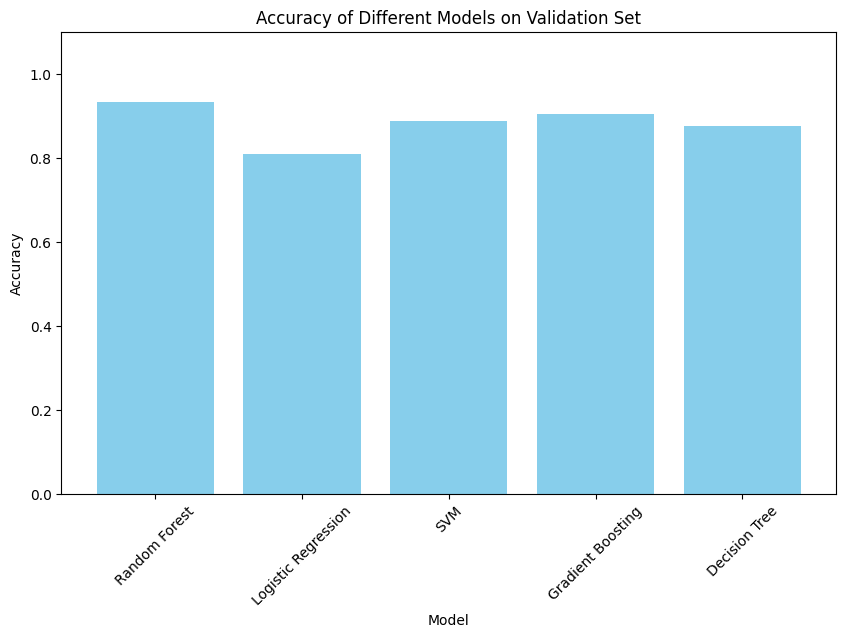

In [214]:
# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_val, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Validation Set')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()

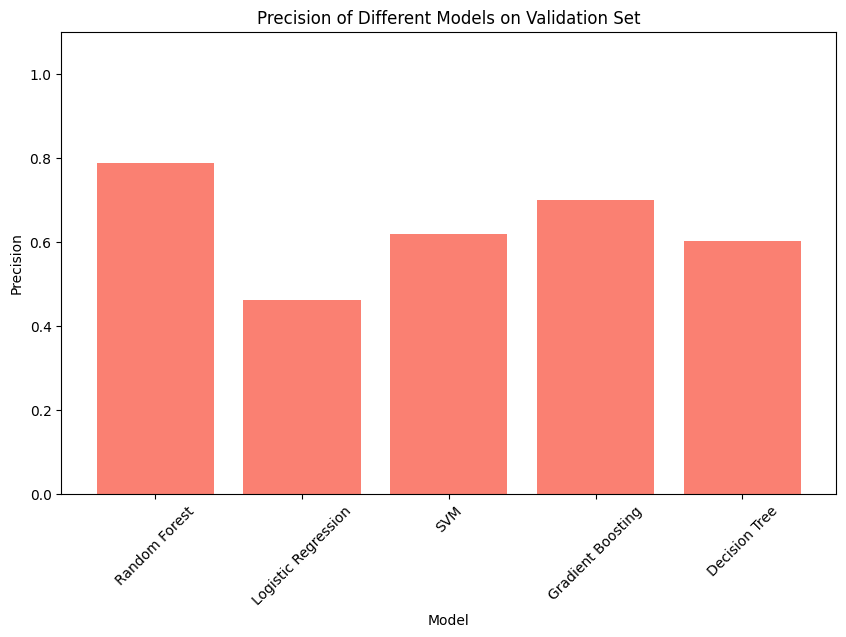

In [215]:
# Plotting Precision
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), precision_val, color='salmon')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models on Validation Set')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()

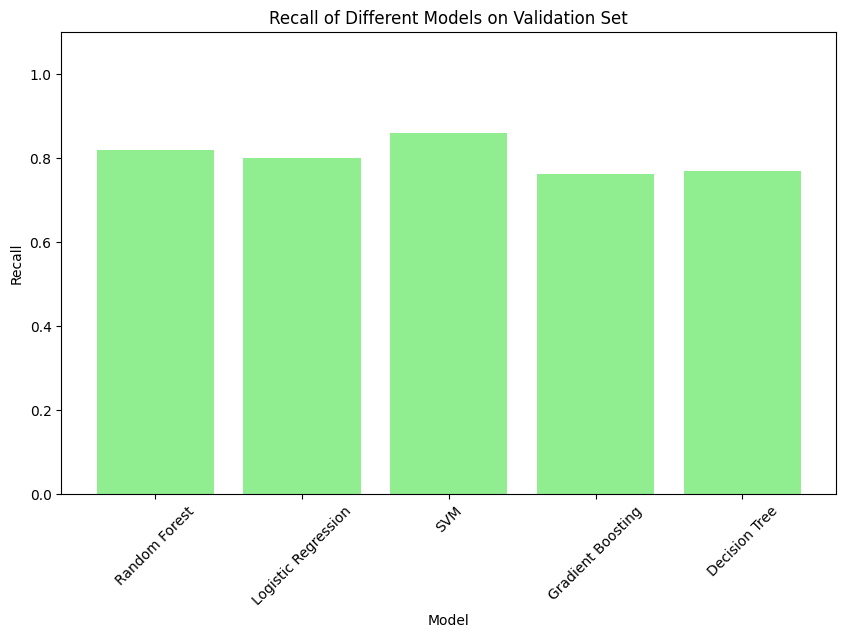

In [216]:
# Plotting Recall
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), recall_val, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models on Validation Set')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()

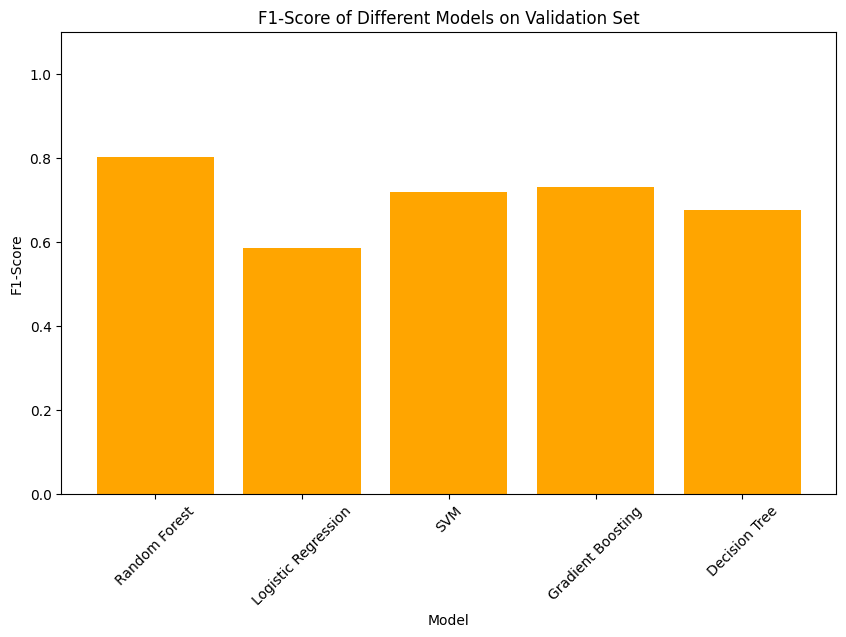

In [217]:
# Plotting F1-Score
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), f1_val, color='orange')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score of Different Models on Validation Set')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show()

In [218]:
# Calculate ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_val, models["Random Forest"].predict_proba(X_val)[:, 1])
rf_auc = roc_auc_score(y_val, models["Random Forest"].predict_proba(X_val)[:, 1])

logistic_fpr, logistic_tpr, _ = roc_curve(y_val, models["Logistic Regression"].predict_proba(X_val)[:, 1])
logistic_auc = roc_auc_score(y_val, models["Logistic Regression"].predict_proba(X_val)[:, 1])

svm_fpr, svm_tpr, _ = roc_curve(y_val, models["SVM"].predict_proba(X_val)[:, 1])
svm_auc = roc_auc_score(y_val, models["SVM"].predict_proba(X_val)[:, 1])

gb_fpr, gb_tpr, _ = roc_curve(y_val, models["Gradient Boosting"].predict_proba(X_val)[:, 1])
gb_auc = roc_auc_score(y_val, models["Gradient Boosting"].predict_proba(X_val)[:, 1])

dt_fpr, dt_tpr, _ = roc_curve(y_val, models["Decision Tree"].predict_proba(X_val)[:, 1])
dt_auc = roc_auc_score(y_val, models["Decision Tree"].predict_proba(X_val)[:, 1])

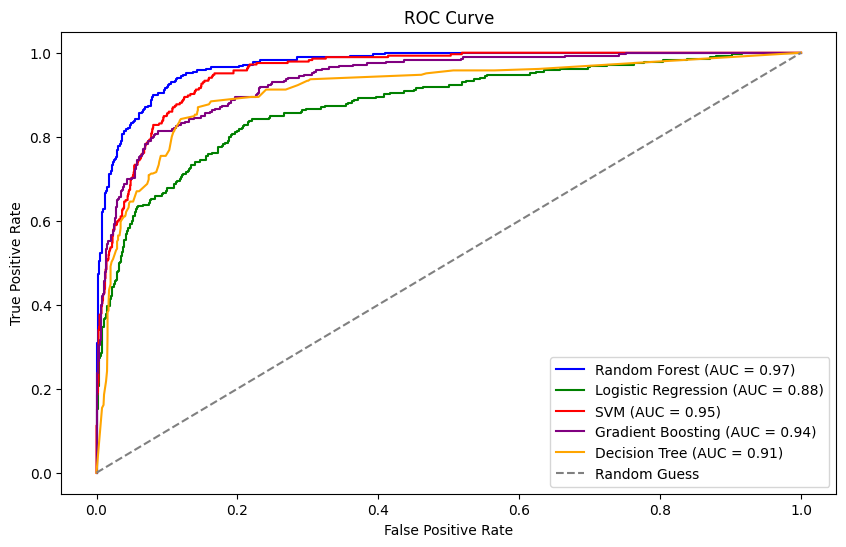

In [219]:
# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})', color='green')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='red')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='purple')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [220]:
# Print out the metrics for each model
for model_name, metric in metrics.items():
    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {metric['Accuracy']:.4f}")
    print(f"Precision: {metric['Precision']:.4f}")
    print(f"Recall: {metric['Recall']:.4f}")
    print(f"F1-Score: {metric['F1-Score']:.4f}")
    print(f"ROC-AUC: {metric['ROC-AUC']:.4f}")


Metrics for Random Forest:
Accuracy: 0.9319
Precision: 0.7872
Recall: 0.8175
F1-Score: 0.8021
ROC-AUC: 0.8863

Metrics for Logistic Regression:
Accuracy: 0.8123
Precision: 0.4668
Recall: 0.7895
F1-Score: 0.5867
ROC-AUC: 0.8032

Metrics for Decision Tree:
Accuracy: 0.8751
Precision: 0.6016
Recall: 0.7684
F1-Score: 0.6749
ROC-AUC: 0.8326

Metrics for SVM:
Accuracy: 0.8869
Precision: 0.6187
Recall: 0.8596
F1-Score: 0.7195
ROC-AUC: 0.8760

Metrics for Gradient Boosting:
Accuracy: 0.9047
Precision: 0.7000
Recall: 0.7614
F1-Score: 0.7294
ROC-AUC: 0.8476
